# Notes (To be deleted in final notebook)

- [HackMD](https://hackmd.io/CRe5MqOUQEu6nOYDS5AKOg)
- [GitHub](https://github.com/KatrionaGoldmann/Eurovision_TDS/)
- [Desert Island Discs notebook](https://github.com/alan-turing-institute/TuringDataStories/blob/master/stories/2022-03-09-Desert-Island-Discs/2022-03-09-Desert-Island-Discs.ipynb) for reference

# Eurovision


> Exploring (non-musical) factors contributing to Eurovision votes in the past 25 years.

- toc: false
- categories: [list, of, tags] (see previously used tags [here](https://alan-turing-institute.github.io/TuringDataStories-fastpages/categories/))
- author(s): list authors
- image: images/story_previews/<file here>

**Authors:**


**Reviewers:**
- Reviewer 1
- Reviewer 2

# Introduction

The Eurovision Song Contest, or *Eurovision* for short, is an annual competition featuring (mostly) European countries.
Each country submits one song, which must be original.
In the current format, participating countries first take part in a semifinal; the top 10 from each semifinal qualify for the finals.
The host country, as well as the "Big Five" (France, Germany, Italy, Spain, and the UK, which make greater financial contributions), directly qualify for the finals.

Traditionally, the winner of the previous competition is chosen to host Eurovision in the following year.
As the 2022 winners, Ukraine would have been the hosts in 2023.
However, this was deemed unsafe in light of the Russian invasion.
The UK (the 2022 runners-up) therefore stepped in, meaning that this year's contest will be held in Liverpool, on 9–13 May 2023.

**TODO: Describe aims**

## Setup

We begin by importing packages and setting up any configuration needed.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid")
plt.rc("font", size=14)

## Data

Data were obtained from the following sources:
 - **TODO** Voting scores
 - **TODO** Performer and song info (incl language)
 - **TODO** Population
 - **TODO** Migration statistics
 - **TODO** Border data
 - **TODO** Winners of each year
 
and aggregated into a CSV file, which can be downloaded from **TODO link**.
To avoid focusing unnecessarily on the data collection process, we simply import this data here.
(**TODO?** For those interested, a data cleaning notebook is hosted separately at LINK.)

The data only includes entries which reached the final; thus, not every participating country is represented every year.

In [4]:
df = pd.read_csv("data/all_covariates.csv", index_col="index")
df.head(n=10)

## NOTE: this probably isn't the most updated dataset!!

,year,from_code2,votes,to_country,lang_own,lang_eng,lang_other,has_border,migration_band,migration_year,to_code2,to_code3,population,count,prop_emigrants,gender,comps_without_win
index,,,,,,,,,,,,,,,,,
0,1999,AT,12.0,Bosnia and Herzegovina,0.0,0.0,1.0,NaN,2000,2000,BA,BIH,4179350.0,273,0.000065,group,43
1,1999,AT,0.0,Belgium,0.0,1.0,0.0,NaN,2000,2000,BE,BEL,10251250.0,2486,0.000243,female,12
2,1999,AT,0.0,Cyprus,1.0,0.0,0.0,NaN,2000,2000,CY,CYP,948237.0,161,0.000170,female,43
3,1999,AT,10.0,Germany,0.0,0.0,1.0,1.0,2000,2000,DE,DEU,82211508.0,181487,0.002208,group,16
4,1999,AT,5.0,Denmark,0.0,1.0,0.0,NaN,2000,2000,DK,DNK,5339616.0,1525,0.000286,group,35
5,1999,AT,3.0,Estonia,1.0,1.0,0.0,NaN,2000,2000,EE,EST,1396985.0,0,0.000000,group,43
6,1999,AT,0.0,Spain,1.0,0.0,0.0,NaN,2000,2000,ES,ESP,40567864.0,5548,0.000137,female,29
7,1999,AT,0.0,France,1.0,0.0,0.0,NaN,2000,2000,FR,FRA,60921384.0,12429,0.000204,female,21
8,1999,AT,0.0,United Kingdom,1.0,1.0,0.0,NaN,2000,2000,GB,GBR,58892514.0,18851,0.000320,group,1


## Covariate visualisation

We begin by performing some exploratory visualisations of the data available to us.
The aim here is to discover some interesting trends, or specific data points, which reveal some underlying information about how Eurovision voting works.

### Voting scores

The most natural place to start is to look at the voting scores themselves.
We can arrange these in the form of a two-dimensional matrix [...]

**TODO description**

In [5]:
df_voting = df[['from_code2', 'votes', 'to_code2', 'year']].copy()

# For each year and performing country, add a column for the average votes (i.e. the average votes per performance)
df_voting['avg_votes'] = df_voting.groupby(['to_code2', 'year'])['votes'].transform('mean')
df_voting['difference_votes'] = df_voting['votes'] - df_voting['avg_votes']
df_voting['avg_difference_votes'] = df_voting.groupby(['from_code2', 'to_code2'])['difference_votes'].transform('mean')

# Remove country pairs where fewer than three votes have been given
df_voting['no_instances'] = df_voting.groupby(['from_code2', 'to_code2'])['difference_votes'].transform('count')
df_voting.loc[df_voting['no_instances'] < 3, 'avg_difference_votes'] = np.nan

df_voting.head()

,from_code2,votes,to_code2,year,avg_votes,difference_votes,avg_difference_votes,no_instances
index,,,,,,,,
0,AT,12.0,BA,1999,9.200000,2.800000,4.400859,8
1,AT,0.0,BE,1999,1.727273,-1.727273,-0.636813,9
2,AT,0.0,CY,1999,0.090909,-0.090909,-1.355286,12
3,AT,10.0,DE,1999,6.363636,3.636364,2.629586,16
4,AT,5.0,DK,1999,3.227273,1.772727,-1.114472,11


In [6]:
df_heatmap = df_voting[['from_code2', 'avg_difference_votes', 'to_code2']]
df_heatmap = df_heatmap.drop_duplicates()

# Remove votes from the country to itself.
df_heatmap.loc[df_heatmap['from_code2'] == df_heatmap['to_code2'], 'avg_difference_votes'] = np.nan
df_heatmap = df_heatmap.dropna(subset=['avg_difference_votes'])

df_heatmap['Voting country'] = df_heatmap['from_code2']
df_heatmap['Performing country'] = df_heatmap['to_code2']
df_heatmap = df_heatmap.pivot(index='Voting country', columns='Performing country', values='avg_difference_votes')

df_heatmap.head(n=10)

Performing country,AL,AM,AT,AU,AZ,BA,BE,BG,BY,CH,...,NO,PL,PT,RO,RS,RU,SE,SI,TR,UA
Voting country,,,,,,,,,,,,,,,,,,,,,
AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.036983,NaN,NaN,1.086486,NaN,NaN,0.574094,NaN,NaN,NaN
AL,NaN,NaN,-1.813381,-0.912332,NaN,NaN,-2.774244,1.694977,NaN,-0.249590,...,-1.701993,-0.626344,-1.373755,-0.517087,-1.505553,-1.490457,-1.263705,-1.126786,5.038717,NaN
AM,NaN,NaN,-1.404826,-3.112332,-5.092659,NaN,-2.087917,-1.555023,2.290673,1.302877,...,-0.454262,-1.182863,0.226245,-1.827182,-1.356942,5.819721,-0.932437,-1.126786,-3.111681,-0.353813
AT,NaN,NaN,NaN,0.887668,NaN,4.400859,-0.636813,0.194977,-1.117859,1.554085,...,-1.535139,1.065436,0.037142,0.680069,2.985857,-1.661127,-0.623926,-0.527580,2.268044,NaN
AU,NaN,NaN,-1.712398,NaN,NaN,NaN,2.730665,0.869725,NaN,NaN,...,-0.094613,-1.243936,NaN,NaN,-0.317355,-2.410133,2.552984,-0.858333,NaN,NaN
AZ,NaN,-4.841518,-2.738160,-2.912332,NaN,NaN,-3.687917,1.203058,3.320236,-0.651720,...,-1.571335,0.617137,-0.973755,1.967991,NaN,3.353964,-3.029461,-0.422143,8.141358,3.978755
BA,NaN,NaN,0.404661,NaN,NaN,NaN,-1.020223,NaN,NaN,-0.349337,...,-1.092397,-0.461138,-0.827739,-1.301477,7.490277,-2.156571,-0.298935,4.649160,2.879224,NaN
BE,NaN,NaN,0.882099,1.087668,NaN,NaN,NaN,0.444977,-1.542660,-0.929832,...,-0.569693,0.137385,1.152253,-0.051002,-1.727776,-1.973932,-0.189537,-0.749803,4.070758,NaN
BG,NaN,NaN,5.156649,-0.965447,NaN,NaN,-1.468870,NaN,-1.267287,-1.581725,...,-2.553094,0.726496,-2.373755,-0.029528,0.466570,0.211122,-2.166700,-1.478571,2.999605,-1.720162


In [56]:
import scipy.spatial as sp
import scipy.cluster.hierarchy as hc

# row order to match column order
df_heatmap = df_heatmap.reindex(df_heatmap.columns)

row_dism = 1 - df_heatmap.T.corr()
row_linkage = hc.linkage(sp.distance.squareform(row_dism), method='complete')

row_linkage

array([[24.        , 37.        ,  0.11346829,  2.        ],
       [20.        , 35.        ,  0.13995725,  2.        ],
       [12.        , 31.        ,  0.2271092 ,  2.        ],
       [10.        , 19.        ,  0.25281133,  2.        ],
       [36.        , 40.        ,  0.2593156 ,  2.        ],
       [ 5.        , 38.        ,  0.28722736,  2.        ],
       [23.        , 28.        ,  0.29423535,  2.        ],
       [41.        , 43.        ,  0.32098717,  4.        ],
       [14.        , 33.        ,  0.32788996,  2.        ],
       [ 2.        ,  9.        ,  0.35835145,  2.        ],
       [13.        , 27.        ,  0.38573411,  2.        ],
       [11.        , 30.        ,  0.41241782,  2.        ],
       [26.        , 51.        ,  0.42201684,  3.        ],
       [ 8.        , 45.        ,  0.45129251,  3.        ],
       [ 0.        , 34.        ,  0.45498716,  2.        ],
       [ 3.        , 22.        ,  0.48373701,  2.        ],
       [15.        , 48.

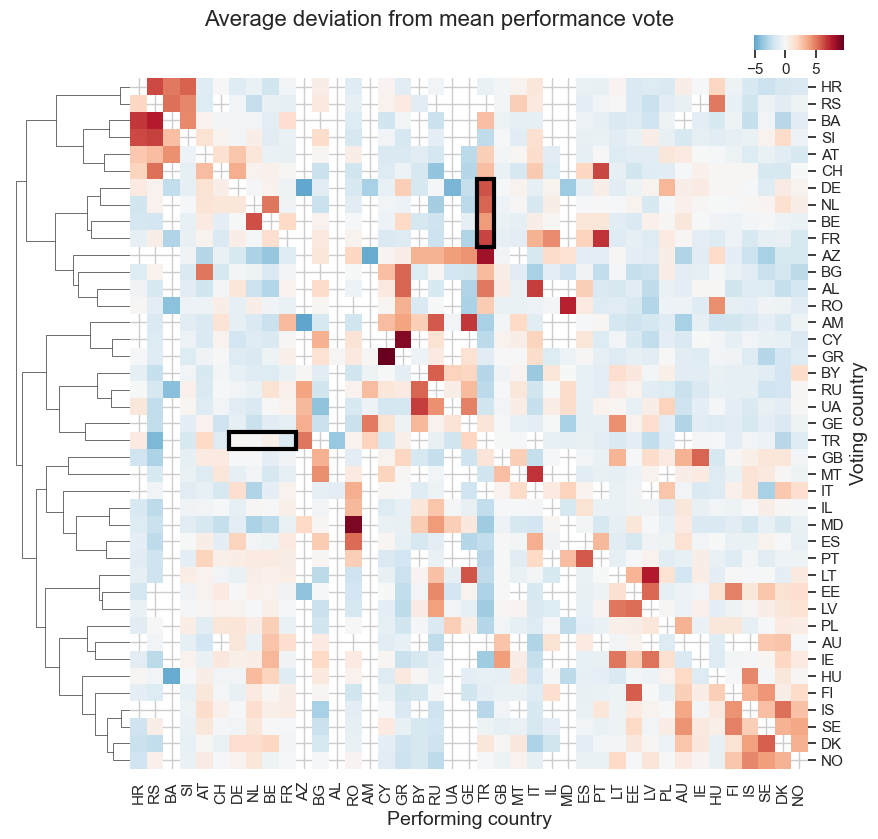

In [8]:

plot = sns.clustermap(df_heatmap, row_linkage=row_linkage, col_linkage=row_linkage, 
                      figsize=(9, 8), mask=df_heatmap.isnull(),
                      dendrogram_ratio=[0.15, 0.01],
                      cbar_pos=(0.85, 1, 0.1, .019),  # x,y, delta x, delta y
                      cbar_kws={"orientation": "horizontal"},
                      cmap='RdBu_r', center=0, xticklabels=1, yticklabels=1)
plot.ax_col_dendrogram.set_visible(False) 

from matplotlib.patches import Rectangle
plot.fig.suptitle('Average deviation from mean performance vote', fontsize=16, y=1.05)
ax = plot.ax_heatmap
ax.set_ylabel('Voting country')
# Highlight Turkey.
ax.add_patch(Rectangle((6, 21), 4, 1, fill=False, edgecolor='black', lw=3)) # turkey
ax.add_patch(Rectangle((21, 6), 1, 4, fill=False, edgecolor='black', lw=3))
plt.show()

In this plot, countries are grouped by ... **TODO** 

There are a number of interesting details in this plot.
For example, the black boxes indicate that Turkey's entries have consistently obtained higher-than-average scores from Germany, the Netherlands, Belgium, and France; but that this isn't reciprocated.
A possible hypothesis for this may be the fact there is a significant Turkish diaspora in these countries: according to Pashayan (2012), there were 10 million "Euro-Turks" in these four countries in 2012.

This suggests that migration data between two countries might be another useful thing to look at.

REF (to be done up properly, and actually just ref 5 from https://en.wikipedia.org/wiki/Turkish_diaspora): Pashayan, Araks (2012), "Integration of Muslims in Europe and the Gülen", in Weller, Paul; Ihsan, Yilmaz (eds.), European Muslims, Civility and Public Life: Perspectives On and From the Gülen Movement, Continuum International Publishing Group, ISBN 978-1-4411-0207-2.

### Migration

 **TODO** Maybe plot prop_emigrants versus the score deviation?

In [45]:
df_migration = df[['year', 'from_code2', 'to_code2', 'prop_emigrants', 'votes']].copy()

# Calculate score deviation per year
df_migration['avg_votes'] = df_migration.groupby(['to_code2', 'year'])['votes'].transform('mean')
df_migration['deviation'] = df_migration['votes'] - df_migration['avg_votes']

# I think the migration data is the wrong way round, so let's switch it around
def get_correct_prop(from_code2, to_code2, year):
    x = df[(df['from_code2'] == to_code2) & (df['to_code2'] == from_code2) & (df['year'] == year)]['prop_emigrants'].squeeze()
    try:
        return float(x)
    except Exception:
        return np.nan
df_migration['correct_prop_emigrants'] = df_migration.apply(lambda r: get_correct_prop(r.from_code2, r.to_code2, r.year), axis=1)

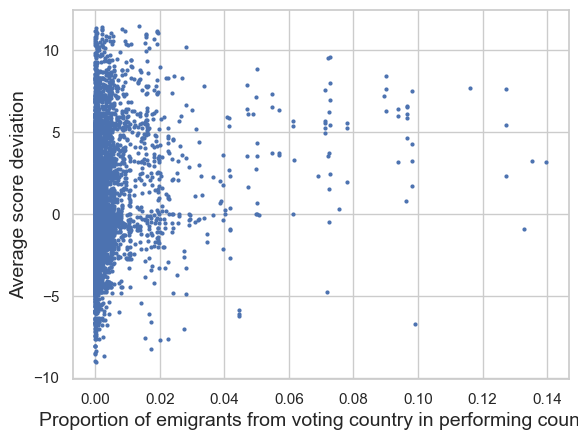

In [48]:
plt.scatter(df_migration['correct_prop_emigrants'], df_migration['deviation'], s=4)
plt.xlabel("Proportion of emigrants from voting country in performing country")
plt.ylabel("Average score deviation")
plt.show()

# Looks like there's something, but hard to make out


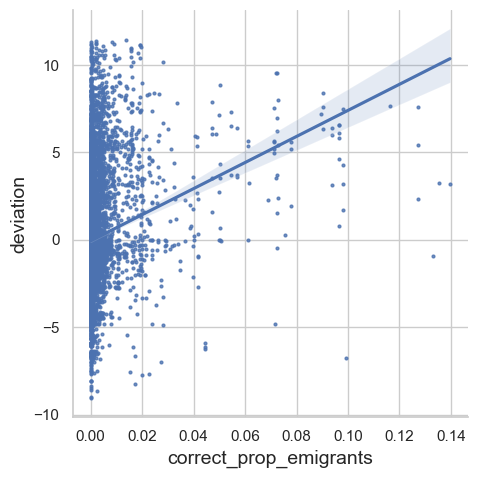

In [58]:
sns.lmplot(x='correct_prop_emigrants', y='deviation', data=df_migration,
           scatter_kws={"s": 4})

# regression is severely biased by the number of data points at low x-values

### Language

**TODO** Get language data cleaned up, see https://github.com/KatrionaGoldmann/Eurovision_TDS/blob/issue-5-exploratory_visualisations/eurovision/notebooks/language_visualistaions.ipynb.

**TODO** Discussion of Eurovision language rules (this has changed over time).

In this dataset, we have categorised the song language into one or more of: the country's official language (`own`), English (`eng`), or an entirely separate language (`other`).
When English *is* one of the country's official languages, both `own` and `other` are selected.
We can use this data to investigate how likely each country is to perform in English:

In [ ]:
lang_df = df[['year', 'to_country', 'lang_own', 'lang_eng', 'lang_other']].copy()
lang_df = lang_df.drop_duplicates(subset=['year', 'to_country'])

# If language is both 'Own' and 'English', set 'Own' to 0 so that we don't double-count.
lang_df.loc[lang_df['lang_own'] == lang_df['lang_eng'], 'lang_own'] = 0
lang_df = lang_df.groupby('to_country').sum().drop(columns="year")
# Calculate ratios
for lang in ['own', 'eng', 'other']:
    lang_df[f'lang_{lang}_ratio'] = lang_df[f'lang_{lang}'] / (lang_df['lang_own'] + lang_df['lang_eng'] + lang_df['lang_other'])
lang_df = lang_df.sort_values(by=['lang_eng_ratio', 'lang_other_ratio'], ascending=True)

lang_df.head()

,lang_own,lang_eng,lang_other,lang_own_ratio,lang_eng_ratio,lang_other_ratio
to_country,,,,,,
Montenegro,2.0,0.0,0.0,1.000000,0.000000,0.000000
Portugal,7.0,0.0,1.0,0.875000,0.000000,0.125000
France,10.0,0.0,11.0,0.476190,0.000000,0.523810
Italy,3.0,0.0,6.0,0.333333,0.000000,0.666667
Spain,13.0,1.0,7.0,0.619048,0.047619,0.333333


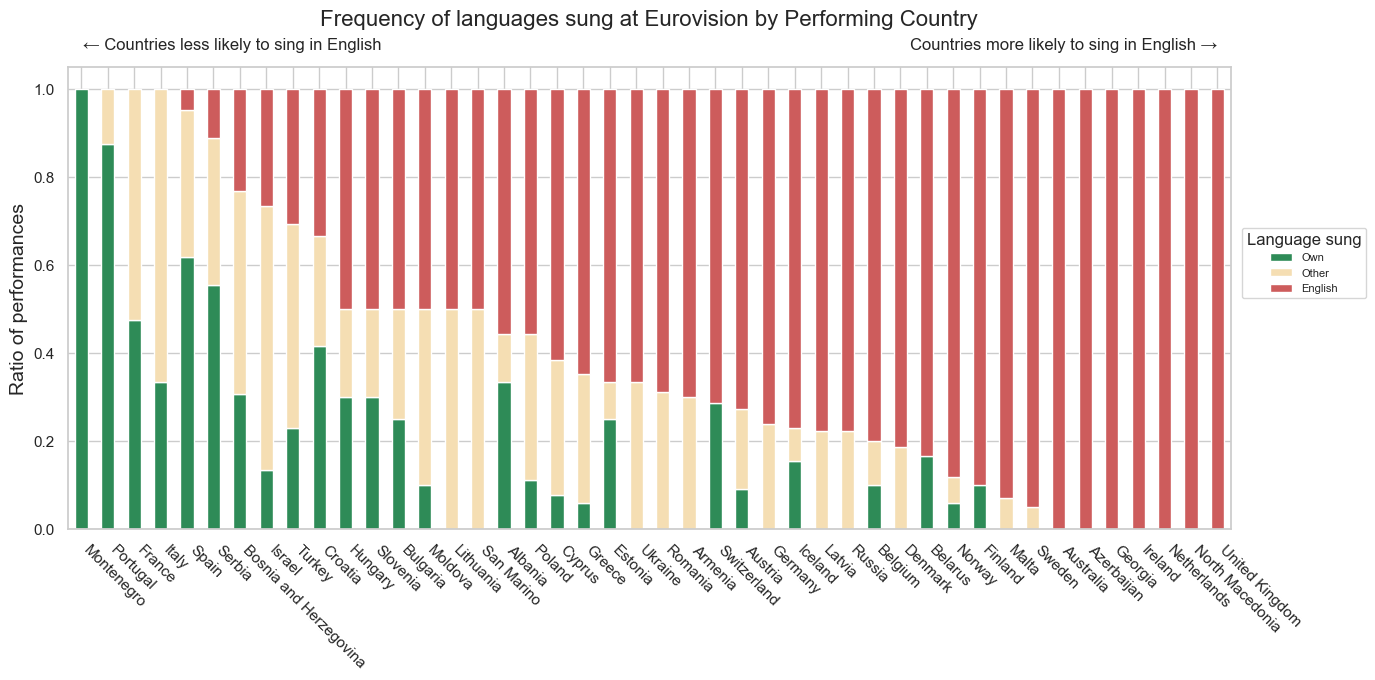

In [ ]:
colors = {
    'lang_own_ratio': 'seagreen',
    'lang_other_ratio': 'wheat',
    'lang_eng_ratio': 'indianred',
}
lang_df[colors.keys()].plot(kind='bar', figsize=(15, 6), stacked=True, color=colors)
plt.text(lang_df.shape[0] - 1, 1.1, 'Countries more likely to sing in English →', ha='right', va='center', fontsize=12)
plt.text(0.05, 1.1, '← Countries less likely to sing in English', ha='left', va='center',  fontsize=12)
plt.legend(['Own', 'Other', 'English'], title="Language sung", loc=[1, 1], fontsize=8,  bbox_to_anchor=(0.51, 0., 0.5, 0.5))
plt.title('Frequency of languages sung at Eurovision by Performing Country', fontsize=16, pad=30)
plt.xticks(rotation=-45, ha='left')
plt.xlabel('')
plt.ylabel('Ratio of performances')
plt.show()

## TODO Modelling

- Discuss chosen model
  - Ordinal regression (as used in the paper: https://doi.org/10.1080/02664763.2014.909792)
  - Partial ranking (possibly)
- Implementation in code
- Make predictions for 2023 based on this year's songs, which will come out soon

# Conclusions

Round everything up, draw conclusions.